In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [489]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [490]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [491]:
df.shape

(50000, 8)

In [492]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [493]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [495]:
# There is no missing value so going for correlations directly

In [496]:
corr=df.corr()

In [497]:
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<AxesSubplot:>

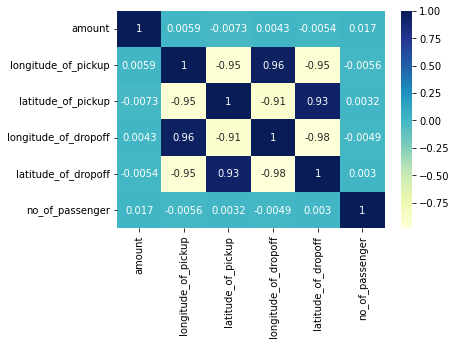

In [498]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

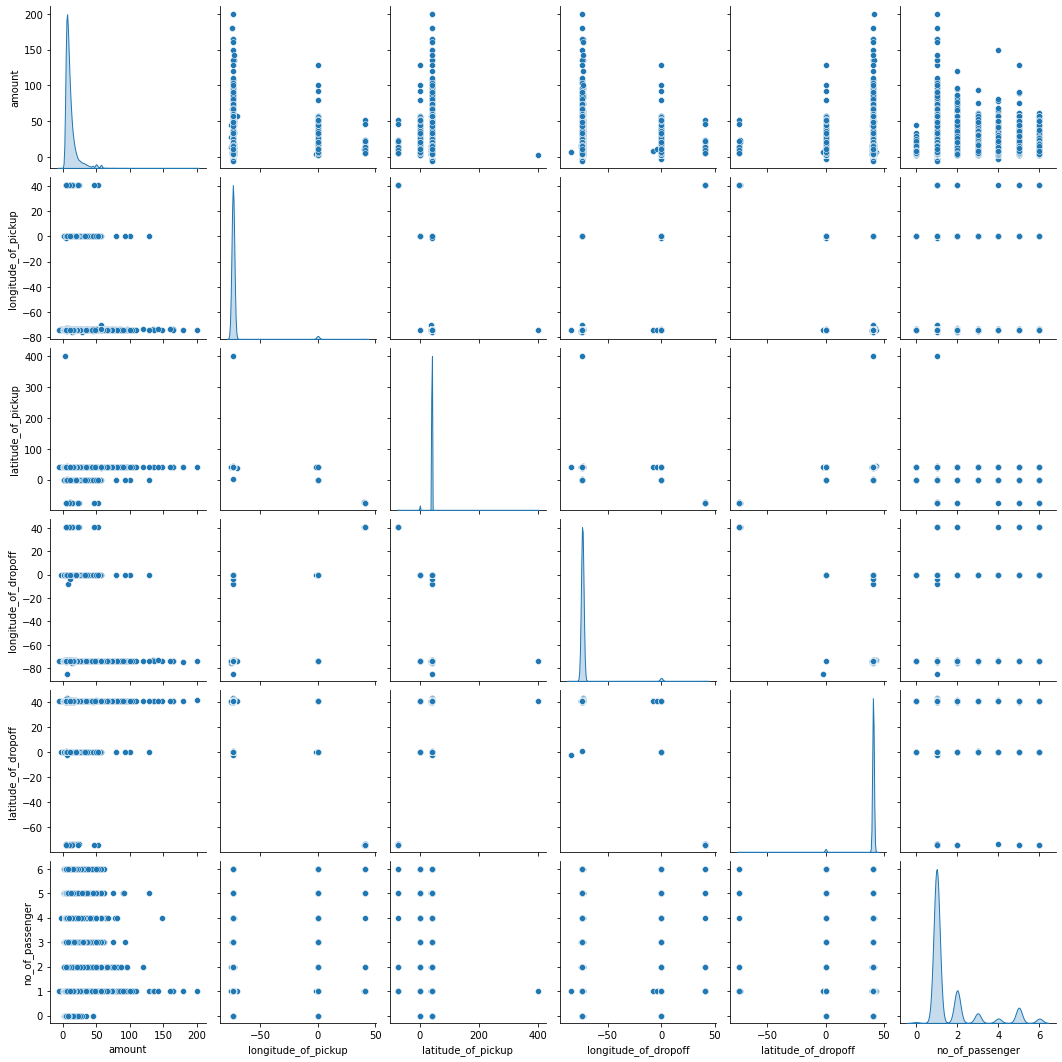

In [499]:
sns.pairplot(df,diag_kind='kde')

In [500]:
# Although correlation is a good score for many of the attributes but due the catagorical based data one can't find it useful to get information directly

In [501]:
# Removing the outliers in the dataset

In [502]:
column=['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']

In [503]:
Q1=df.longitude_of_pickup.quantile(0.25)
Q3=df.longitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.992062 -73.96714800000001 0.02491399999999544


In [504]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(-74.029433, -73.92977700000002)

In [505]:
df2=df[(df.longitude_of_pickup<high)&(df.longitude_of_pickup>low)]

In [506]:
Q1=df2.latitude_of_pickup.quantile(0.25)
Q3=df2.latitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.737032 40.7666385 0.02960649999999987


In [507]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(40.69262225, 40.81104825)

In [508]:
df3=df2[(df2.latitude_of_pickup<high)&(df2.latitude_of_pickup>low)]

In [509]:
Q1=df3.longitude_of_dropoff.quantile(0.25)
Q3=df3.longitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.991533 -73.9667415 0.024791500000006295


In [510]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(-74.02872025000002, -73.92955425)

In [511]:
df4=df3[(df3.longitude_of_dropoff<high)&(df3.longitude_of_dropoff>low)]

In [512]:
Q1=df4.latitude_of_dropoff.quantile(0.25)
Q3=df4.latitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.737191 40.76789856 0.030707559999996192


In [513]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(40.69112966000001, 40.81395989999999)

In [514]:
df=df4[(df4.latitude_of_dropoff<high)&(df3.latitude_of_dropoff>low)]

<ipython-input-514-810140e78b9e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df4[(df4.latitude_of_dropoff<high)&(df3.latitude_of_dropoff>low)]


In [515]:
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1


In [516]:
# Now let us deal with the outliers in amount and number of passenger

In [517]:
df=df[(df.no_of_passenger>0)]     #Number of passengers cann't be 0

In [518]:
Q1=df.amount.quantile(0.25)
Q3=df.amount.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

5.7 11.0 5.3


In [519]:
low=0.5               #taking the lower threshold as 0.5, Q1-1.5*IQR is coming to be -ve 
high=Q3+1.5*IQR
low,high

(0.5, 18.95)

In [520]:
df=df[(df.amount<high)&(df.amount>low)]

In [521]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,40682.000000,40682.000000,40682.000000,40682.000000,40682.000000,40682.000000
mean,8.396197,-73.981859,40.752836,-73.980817,40.753473,1.668232
std,3.493493,0.015994,0.021035,0.016660,0.022046,1.283082
min,2.500000,-74.026443,40.692660,-74.027525,40.691177,1.000000
25%,5.700000,-73.992715,40.738495,-73.991911,40.738929,1.000000
50%,7.700000,-73.982795,40.753678,-73.981955,40.754637,1.000000
75%,10.500000,-73.971610,40.766728,-73.970631,40.767592,2.000000
max,18.900000,-73.929878,40.810917,-73.929593,40.813934,6.000000


In [522]:
# Now the dataset is free of any outliers now removing duplicates

In [523]:
df.drop_duplicates(inplace=True)

In [524]:
# dropping the unnecessary data columns which are date_time_of_pickup,unique_id

In [525]:
column=['date_time_of_pickup','unique_id']
df.drop(column,axis=1,inplace=True)

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40682 entries, 1 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                40682 non-null  float64
 1   longitude_of_pickup   40682 non-null  float64
 2   latitude_of_pickup    40682 non-null  float64
 3   longitude_of_dropoff  40682 non-null  float64
 4   latitude_of_dropoff   40682 non-null  float64
 5   no_of_passenger       40682 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.2 MB


In [527]:
# There are only int and float datatypes hence no need of encoding

In [528]:
x_ns=df.drop(['amount'],axis=1)        #not standardised
y_ns=df['amount']      #not standardised

In [529]:
x_ns_train,x_ns_test,y_ns_train,y_ns_test=train_test_split(x_ns,y_ns,test_size=0.2)

In [530]:
x_ns_train.shape

(32545, 5)

In [531]:
x_ns_test.shape

(8137, 5)

In [532]:
# Linear Regression without standardisation

In [533]:
model1=LinearRegression(n_jobs=10)

In [534]:
model1.fit(x_ns_train,y_ns_train)

LinearRegression(n_jobs=10)

In [535]:
model1.score(x_ns_train,y_ns_train)

0.012306330246267816

In [536]:
model1.score(x_ns_test,y_ns_test)

0.011355836932559482

In [537]:
# KNN without standardisation

In [538]:
model2=KNeighborsRegressor(n_neighbors=6)

In [539]:
model2.fit(x_ns_train,y_ns_train)

KNeighborsRegressor(n_neighbors=6)

In [540]:
model2.score(x_ns_train,y_ns_train)

0.7499797907694028

In [541]:
model2.score(x_ns_test,y_ns_test)

0.6290868283835731

In [542]:
# SVR without standardisation

In [543]:
model3=SVR(kernel = 'poly')

In [544]:
model3.fit(x_ns_train,y_ns_train)

SVR(kernel='poly')

In [545]:
model3.score(x_ns_train,y_ns_train)

-0.04634651142804036

In [546]:
model3.score(x_ns_test,y_ns_test)

-0.05151949511567544

In [547]:
# Now standardising the dataset for better modelling of the dataset

In [548]:
df_std=df

In [549]:
model_std=StandardScaler()

In [550]:
model_std.fit_transform(df_std)

array([[ 2.43421318, -2.13762156, -1.97446855,  0.09295273,  1.29421109,
        -0.52080832],
       [-0.77178638, -0.0549887 ,  0.40096387, -0.62579365, -0.13203774,
         0.25857458],
       [-0.19928646, -0.32958862, -0.93619441, -0.64530196,  0.20953257,
        -0.52080832],
       ...,
       [-0.42828643, -1.30294283, -0.63740535, -1.03792933,  0.27263009,
        -0.52080832],
       [-1.11528633,  2.23809576,  1.17572366,  1.64269334,  1.18910905,
         0.25857458],
       [ 0.71671341,  3.07958948,  0.52147784,  2.89404675,  0.46868147,
        -0.52080832]])

In [551]:
x=df_std.drop(['amount'],axis=1)
y=df_std['amount'] 

In [552]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [553]:
x_train.shape

(32545, 5)

In [554]:
x_test.shape

(8137, 5)

In [555]:
# Linear Regression

In [556]:
model4=LinearRegression(n_jobs=15)

In [557]:
model4.fit(x_train,y_train)

LinearRegression(n_jobs=15)

In [558]:
model4.score(x_train,y_train)

0.012543730002801845

In [559]:
model4.score(x_test,y_test)

0.010466836833868842

In [560]:
# KNN Regression

In [561]:
model5=KNeighborsRegressor(n_neighbors=11)

In [562]:
model5.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [563]:
model5.score(x_train,y_train)

0.717164829539872

In [564]:
model5.score(x_test,y_test)

0.6512874693122358

In [565]:
# SVR 

In [566]:
model6=SVR()

In [567]:
model6.fit(x_train,y_train)

SVR()

In [568]:
model6.score(x_train,y_train)

-0.048702498107424885

In [569]:
model6.score(x_test,y_test)

-0.044884655076408375

In [570]:
# The models are not fitting properly even after standardising this can be because of uneven values of latitude and longitude so let us take the change in coordinates 

In [571]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1


In [572]:
df['longitude_of_pickup']=abs(df['longitude_of_pickup']-df['longitude_of_dropoff'])

In [573]:
df['latitude_of_pickup']=abs(df['latitude_of_pickup']-df['latitude_of_dropoff'])

In [574]:
column=['longitude_of_dropoff','latitude_of_dropoff']
df.drop(column,axis=1,inplace=True)

In [575]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger
1,16.9,0.036780,0.070701,1
2,5.7,0.008504,0.010708,2
3,7.7,0.004437,0.024949,1
4,5.3,0.011440,0.015754,1
5,12.1,0.028072,0.026603,1


In [576]:
df.rename(columns={'latitude_of_pickup': 'Latitude_change'}, inplace=True)

In [577]:
df.rename(columns={'longitude_of_pickup': 'Longitude_change'}, inplace=True)

In [578]:
# Now standardising the dataset for better modelling of the dataset

In [579]:
model_std=StandardScaler()

In [580]:
model_std.fit_transform(df)

array([[ 2.43421318,  2.15227352,  4.18740802, -0.52080832],
       [-0.77178638, -0.47555229, -0.4137537 ,  0.25857458],
       [-0.19928646, -0.85351832,  0.67845946, -0.52080832],
       ...,
       [-0.42828643, -0.83929929,  0.30311425, -0.52080832],
       [-1.11528633, -0.57926758, -1.07241015,  0.25857458],
       [ 0.71671341, -1.26587025, -1.2350035 , -0.52080832]])

In [581]:
df.head()

,amount,Longitude_change,Latitude_change,no_of_passenger
1,16.9,0.036780,0.070701,1
2,5.7,0.008504,0.010708,2
3,7.7,0.004437,0.024949,1
4,5.3,0.011440,0.015754,1
5,12.1,0.028072,0.026603,1


In [582]:
x=df.drop(['amount'],axis=1)
y=df['amount'] 

In [583]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [584]:
x_train.shape

(32545, 3)

In [585]:
x_test.shape

(8137, 3)

In [586]:
# Linear Regression

In [587]:
model7=LinearRegression(n_jobs=7)

In [588]:
model7.fit(x_train,y_train)

LinearRegression(n_jobs=7)

In [589]:
model7.score(x_train,y_train)

0.6056865246523712

In [590]:
model7.score(x_test,y_test)

0.5981754347577442

In [591]:
#KNN

In [592]:
model8=KNeighborsRegressor(n_neighbors=30)

In [593]:
model8.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [594]:
model8.score(x_train,y_train)

0.6869931432054543

In [595]:
model8.score(x_test,y_test)

0.6608195406681352

In [596]:
# SVR

In [597]:
model9=SVR(kernel='linear',degree=15)

In [598]:
model9.fit(x_train,y_train)

SVR(degree=15, kernel='linear')

In [599]:
model9.score(x_train,y_train)

0.5467703694590125

In [600]:
model9.score(x_test,y_test)

0.5405512095217653

In [601]:
# Decision Tree Regression

In [602]:
model10=DecisionTreeRegressor(max_depth=6,min_samples_leaf=5)

In [603]:
model10.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

In [604]:
model10.score(x_train,y_train)

0.6750196607245902

In [605]:
model10.score(x_test,y_test)

0.6581711677336171

In [606]:
# Bagging Regression

In [607]:
model11=BaggingRegressor(n_estimators=5,max_samples=25)

In [608]:
model11.fit(x_train,y_train)

BaggingRegressor(max_samples=25, n_estimators=5)

In [609]:
model11.score(x_train,y_train)

0.5845251823203867

In [610]:
model11.score(x_test,y_test)

0.5842809334612173

In [611]:
# Adaboost Regression

In [612]:
model12=AdaBoostRegressor(n_estimators=1,learning_rate=10,loss='exponential',random_state=0)

In [613]:
model12.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=1,
                  random_state=0)

In [614]:
model12.score(x_train,y_train)

0.6147073504920204

In [615]:
model12.score(x_test,y_test)

0.6015603685763167

In [616]:
# Gradient Boost Regression

In [617]:
model13=GradientBoostingRegressor(n_estimators=550)

In [618]:
model13.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=550)

In [619]:
model13.score(x_train,y_train)

0.705557123022292

In [620]:
model13.score(x_test,y_test)

0.6620241680627514

In [621]:
# Random Forest regression

In [622]:
model14=RandomForestRegressor(max_depth=5)

In [623]:
model14.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [624]:
model14.score(x_train,y_train)

0.6727444562530895

In [625]:
model14.score(x_test,y_test)

0.6596656876968185

In [627]:
# In Taxi Fare Prediction we need to predict a value which ranges from (0,inf) although inf is not practically possible.
# Hence for such prediction we used regressors which are used to predict better in case of ranges.

In [628]:
# In this Taxi Fare Prediction the data is very small with only three information columns i.e. number of passengers and both coordinates change
# Such small dataset(in terms of columns) may not acheive a very good score as they doesn't have good scope to ommit a non fitting column 
# Hence the best fitting model came out to be Gradient Boost Algorithm
# Gradient Boost got a score of 70% vs 66.2%
# Gradient Boost got such score as gradient boosting is a tree based regressor which improve its previous error.
# In contrast to Adaboost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of predecessor as labels.
# Hence for the dataset Taxi Fare Prediction GRADIENT BOOSTING is best possible.